Group Assignment

In [2]:
!pip install kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oaladeyelu","key":"626ecbe5db6e16d1b64effc0e9f948dc"}'}

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d sahilnbajaj/lending-club-loan-data

Dataset URL: https://www.kaggle.com/datasets/sahilnbajaj/lending-club-loan-data
License(s): Apache 2.0
 62% 17.0M/27.5M [00:00<00:00, 55.2MB/s]
100% 27.5M/27.5M [00:00<00:00, 66.9MB/s]


In [10]:
!unzip lending-club-loan-data.zip

Archive:  lending-club-loan-data.zip
  inflating: lending_club_info.csv   
  inflating: lending_club_loan_two.csv  


In [13]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('lending_club_loan_two.csv')  # Change 'loan.csv' to the name of your dataset file

# View the first few rows of the DataFrame
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


Describe

In [17]:
descriptive_stats = df.describe()
descriptive_stats

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


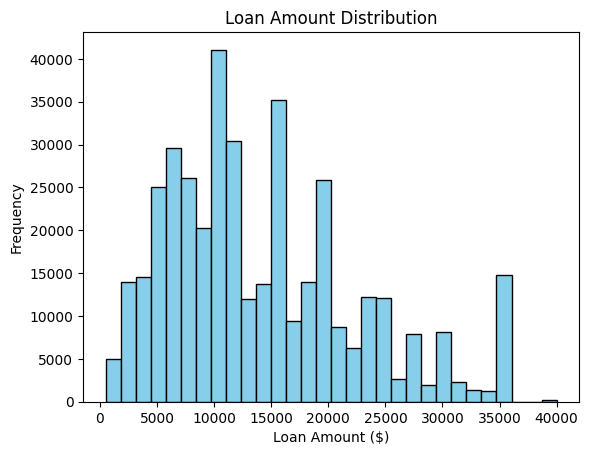

In [18]:
# Analysis 2: Loan Amount Distribution
import matplotlib.pyplot as plt

plt.hist(df['loan_amnt'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')
plt.show()

In [19]:
# Analysis 3: Term Analysis
term_counts = df['term'].value_counts()
print(term_counts)

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64


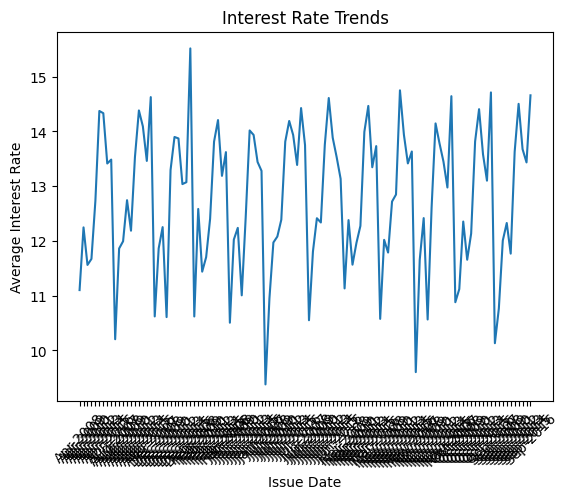

In [20]:
# Analysis 4: Interest Rate Trends
plt.plot(df.groupby('issue_d')['int_rate'].mean())
plt.xlabel('Issue Date')
plt.ylabel('Average Interest Rate')
plt.title('Interest Rate Trends')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Analysis 5: Grade/Subgrade Analysis
grade_counts = df['grade'].value_counts()
sub_grade_counts = df['sub_grade'].value_counts()

print(grade_counts)
print(sub_grade_counts)


grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64
sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64


In [25]:
# Analysis 6: Employment Length Analysis
emp_length_counts = df['emp_length'].value_counts()
emp_length_counts


emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [26]:
# Analysis 7: Home Ownership Analysis
home_ownership_counts = df['home_ownership'].value_counts()
home_ownership_counts


home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

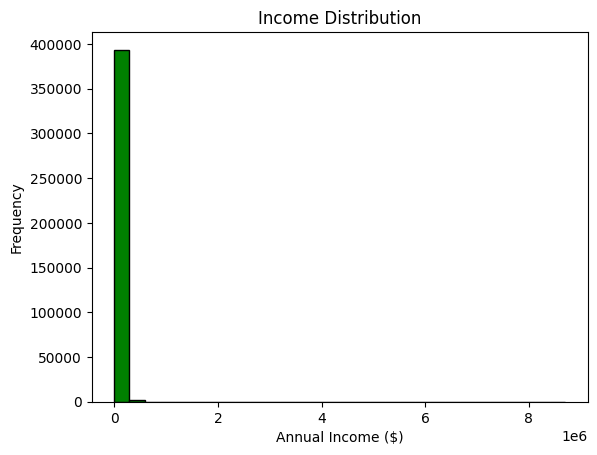

In [27]:
# Analysis 8: Income Analysis
plt.hist(df['annual_inc'], bins=30, color='green', edgecolor='black')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()


In [28]:
# Analysis 9: Verification Status Analysis
verification_counts = df['verification_status'].value_counts()
print(verification_counts)


verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64


In [29]:
# Analysis 10: Loan Purpose Analysis
purpose_counts = df['purpose'].value_counts()
print(purpose_counts)


purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64


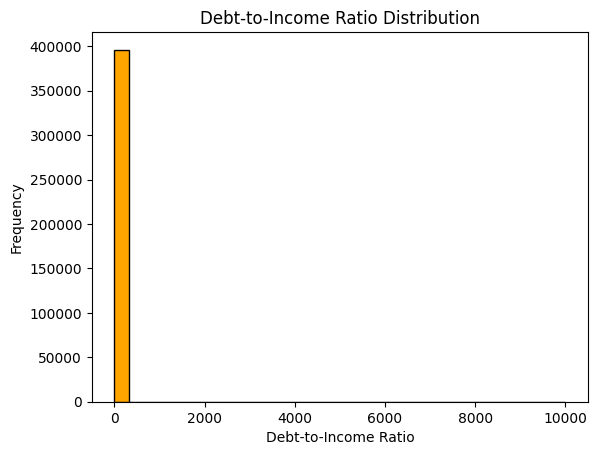

In [30]:
# Analysis 11: Debt-to-Income Ratio Analysis
plt.hist(df['dti'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Debt-to-Income Ratio Distribution')
plt.show()


Summary Statistics of Credit History:
count    396030.000000
mean         15.754323
std           7.201072
min           2.997947
25%          10.915811
50%          14.335387
75%          19.334702
max          70.162902
Name: credit_history_years, dtype: float64


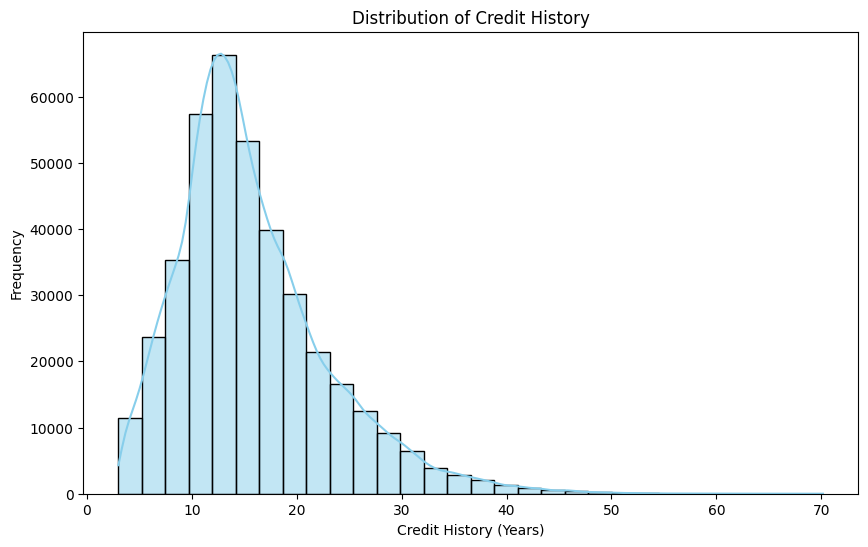

In [42]:
# Convert 'issue_d' and 'earliest_cr_line' to datetime format if they are not already
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

# Calculate credit history in years
df['credit_history_years'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 365.25

# Summary statistics of credit history
credit_history_stats = df['credit_history_years'].describe()
print("Summary Statistics of Credit History:")
print(credit_history_stats)

# Visualize the distribution of credit history
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['credit_history_years'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Credit History (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Credit History')
plt.show()


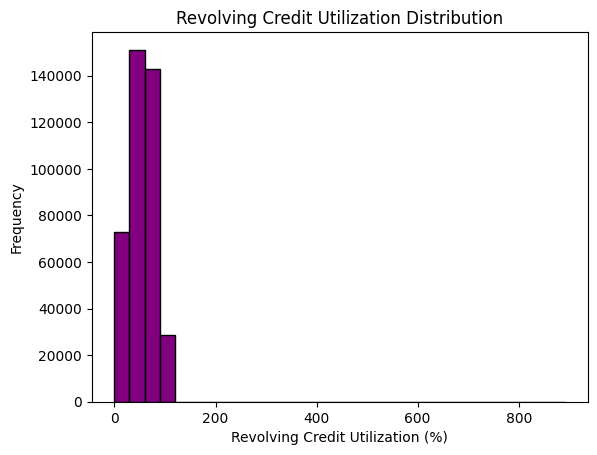

In [32]:
# Analysis 13: Credit Utilization Analysis
plt.hist(df['revol_util'], bins=30, color='purple', edgecolor='black')
plt.xlabel('Revolving Credit Utilization (%)')
plt.ylabel('Frequency')
plt.title('Revolving Credit Utilization Distribution')
plt.show()


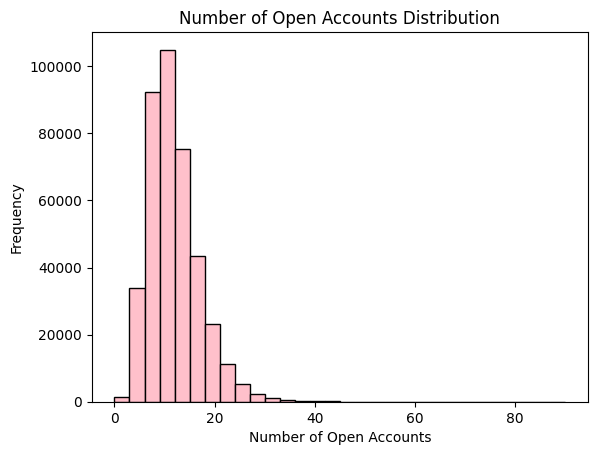

In [33]:
# Analysis 14: Number of Open Accounts Analysis
plt.hist(df['open_acc'], bins=30, color='pink', edgecolor='black')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Frequency')
plt.title('Number of Open Accounts Distribution')
plt.show()


In [34]:
# Analysis 15: Public Records Analysis
pub_rec_counts = df['pub_rec'].value_counts()
print(pub_rec_counts)


pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64


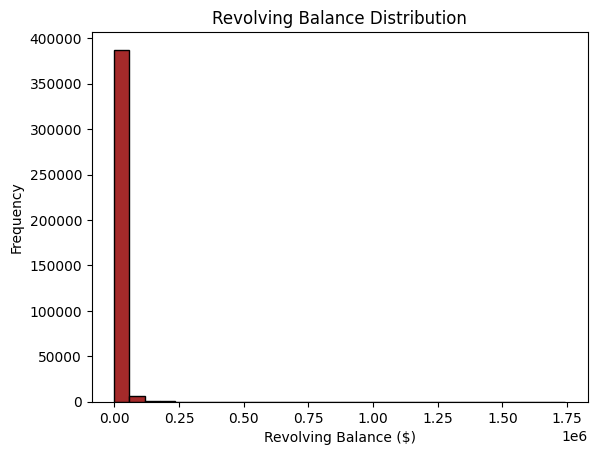

In [35]:
# Analysis 16: Revolving Balance Analysis
plt.hist(df['revol_bal'], bins=30, color='brown', edgecolor='black')
plt.xlabel('Revolving Balance ($)')
plt.ylabel('Frequency')
plt.title('Revolving Balance Distribution')
plt.show()


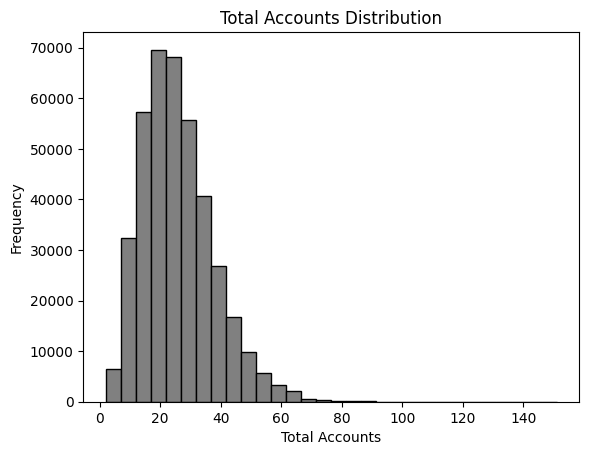

In [36]:
# Analysis 17: Total Accounts Analysis
plt.hist(df['total_acc'], bins=30, color='gray', edgecolor='black')
plt.xlabel('Total Accounts')
plt.ylabel('Frequency')
plt.title('Total Accounts Distribution')
plt.show()


In [37]:
# Analysis 18: Initial List Status Analysis
initial_list_status_counts = df['initial_list_status'].value_counts()
print(initial_list_status_counts)


initial_list_status
f    238066
w    157964
Name: count, dtype: int64


In [38]:
# Analysis 19: Application Type Analysis
application_type_counts = df['application_type'].value_counts()
print(application_type_counts)


application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64


In [39]:
# Analysis 20: Mortgage Accounts Analysis
mort_acc_counts = df['mort_acc'].value_counts()
print(mort_acc_counts)

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64


Answers to the Research Questions

In [44]:
# Research Question 1: Demographic characteristics of borrowers
demographic_characteristics = df[['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
                                  'home_ownership', 'annual_inc', 'verification_status']]
print("Demographic Characteristics of Borrowers:")
print(demographic_characteristics.head())

Demographic Characteristics of Borrowers:
   loan_amnt        term  int_rate grade sub_grade emp_length home_ownership  \
0    10000.0   36 months     11.44     B        B4  10+ years           RENT   
1     8000.0   36 months     11.99     B        B5    4 years       MORTGAGE   
2    15600.0   36 months     10.49     B        B3   < 1 year           RENT   
3     7200.0   36 months      6.49     A        A2    6 years           RENT   
4    24375.0   60 months     17.27     C        C5    9 years       MORTGAGE   

   annual_inc verification_status  
0    117000.0        Not Verified  
1     65000.0        Not Verified  
2     43057.0     Source Verified  
3     54000.0        Not Verified  
4     55000.0            Verified  


In [45]:
# Research Question 2: Loan purposes among different borrower groups
loan_purposes = df.groupby('purpose')['loan_amnt'].sum()
print("\nLoan Purposes and Total Amounts:")
print(loan_purposes)



Loan Purposes and Total Amounts:
purpose
car                   3.861595e+07
credit_card           1.202306e+09
debt_consolidation    3.489117e+09
educational           1.752925e+06
home_improvement      3.391606e+08
house                 3.388482e+07
major_purchase        9.606522e+07
medical               3.757452e+07
moving                2.247350e+07
other                 2.039809e+08
renewable_energy      3.076750e+06
small_business        8.772265e+07
vacation              1.525205e+07
wedding               1.854002e+07
Name: loan_amnt, dtype: float64


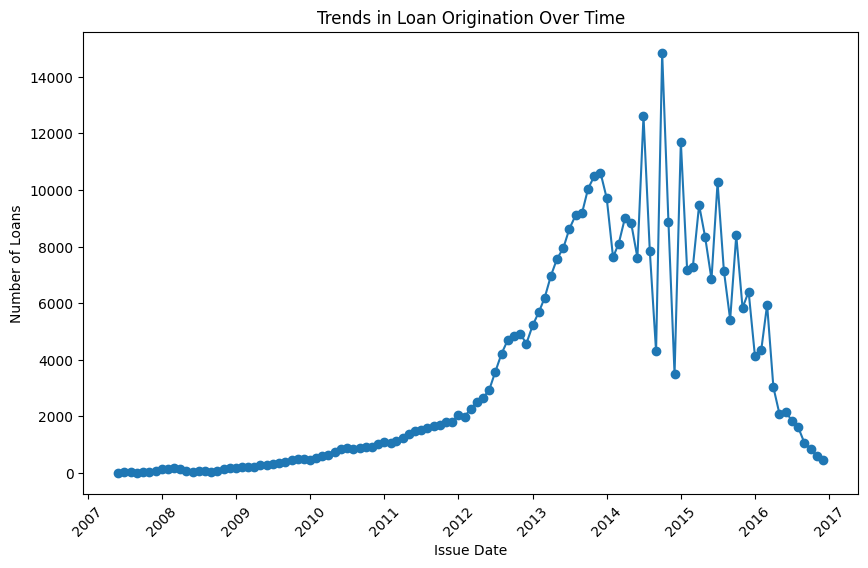

In [53]:
# Research Question 3: Trends or patterns in borrower behavior over time or regions
# Assuming 'issue_d' column represents time and 'region' column represents regions
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('issue_d').size(), marker='o', linestyle='-')
plt.xlabel('Issue Date')
plt.ylabel('Number of Loans')
plt.title('Trends in Loan Origination Over Time')
plt.xticks(rotation=45)
plt.show()

#region_loan_counts = df['region'].value_counts()
#print("\nLoan Counts by Region:")
#print(region_loan_counts)


In [47]:
# Research Question 4: Predictive model to assess borrower risk
# Example: Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select relevant features and target variable
X = df[['loan_amnt', 'int_rate', 'annual_inc', 'dti']]
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict loan status on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("\nLogistic Regression Model Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Model Accuracy: 0.8032977299699517

Classification Report:
              precision    recall  f1-score   support

 Charged Off       0.00      0.00      0.00     15577
  Fully Paid       0.80      1.00      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.40      0.50      0.45     79206
weighted avg       0.65      0.80      0.72     79206



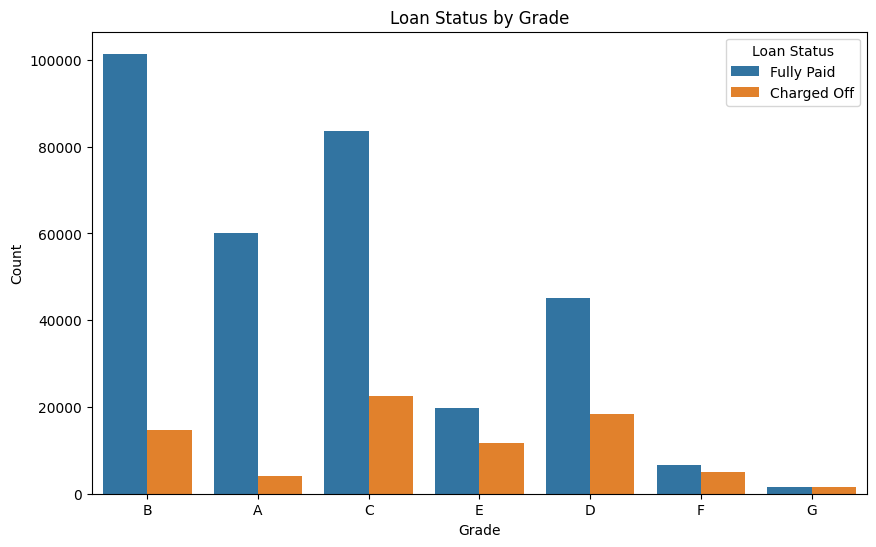


Default Rates by Grade:
loan_status  Charged Off  Fully Paid
grade                               
A               0.062879    0.937121
B               0.125730    0.874270
C               0.211809    0.788191
D               0.288678    0.711322
E               0.373634    0.626366
F               0.427880    0.572120
G               0.478389    0.521611


In [54]:
# Research Question 5: Optimizing investment strategies based on borrower characteristics
# Example: Analyzing default rates across different borrower groups
import seaborn as sns

# Define borrower groups based on a relevant characteristic (e.g., grade)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', hue='loan_status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Loan Status by Grade')
plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'])
plt.show()

# Calculate default rates by borrower group
default_rates = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()
print("\nDefault Rates by Grade:")
print(default_rates)

In [55]:
# Research Question 6: Impact of income verification on loan repayment
verification_status_counts = df['verification_status'].value_counts()
print("\nVerification Status Counts:")
print(verification_status_counts)


Verification Status Counts:
verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64


Title: Exploring Borrower Characteristics and Loan Performance: A Lending Club Study

Description:
The Lending Club dataset offers a rich source of information encompassing various loan attributes, borrower demographics, and credit history. This comprehensive dataset enables detailed analysis of borrower characteristics, loan performance, and factors influencing lending decisions within the Lending Club platform.

1. Demographic Characteristics of Borrowers:
The demographic characteristics of borrowers in the Lending Club dataset include individuals with varying loan amounts, loan terms, interest rates, grades, sub-grades, employment lengths, home ownership statuses, annual incomes, and verification statuses. For example, borrowers have annual incomes ranging from $17,000 to $117,000, with different levels of employment lengths and home ownership statuses.

2. Variation in Loan Purposes:
Loan purposes vary among different borrower groups, with significant disparities in the total loan amounts across various purposes. The majority of loans are used for debt consolidation, credit card refinancing, home improvement, and major purchases, while smaller amounts are allocated for purposes such as education, medical expenses, and small businesses.

3. Trends and Patterns in Borrower Behavior:
Analysis of borrower behavior over time reveals fluctuating trends and patterns in loan origination. There is a sharp increase in loan origination from the start of 2013 to mid-2013, followed by several sharp drops and increases in 2014 and 2015. However, there is a consistent reduction in loan origination from 2016 to 2017.

4. Predictive Model for Borrower Risk Assessment:
A logistic regression model was developed to assess borrower risk based on demographic and credit profile attributes. The model achieved an accuracy of approximately 80.3% in predicting loan status. However, it exhibited limitations in predicting charged-off loans, with precision, recall, and f1-score for 'Charged Off' class being 0.00.

5. Optimizing Investment Strategies:
Investors can optimize their investment strategies based on borrower characteristics, such as credit grade. Analysis of default rates by grade reveals varying default rates across different borrower groups. For instance, default rates increase with lower credit grades, with 'G' grade having the highest default rate of approximately 47.8%.

6. Impact of Income Verification:
Income verification emerges as a significant factor in the borrower's ability to pay back the loan. The dataset shows that there are more verified and source-verified borrowers compared to those not verified, suggesting a potential correlation between income verification status and loan repayment performance.